In [1]:
import pickle as pkl
import numpy as np
import pandas as pd

In [110]:
N_order_accept_ls = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60,65,70,75,80,85,90,95,100,105,110,115]
N_exper_ls = [100]*len(N_order_accept_ls)

In [111]:
accept_ratio_ls = []
total_cost_ls = []
fixed_cost_ls = []
part_cost_ls = []
fuel_cost_ls = []
dist_ls = []

for i in range(len(N_order_accept_ls)):
    N_order_accept = N_order_accept_ls[i]
    N_exper = N_exper_ls[i]
    with open('result/current_strategy cost_result N_order_accepted:{} N_exper:{}.pkl'.format(N_order_accept, N_exper) ,'rb') as file:
        result_summary = pkl.load(file)


    one_cost_df = pd.DataFrame(result_summary['cost'])
    one_dist_ls = result_summary['dist']
    one_accept_num_df = pd.DataFrame(result_summary['accept_num'])

    total_cost_ls.append(one_cost_df['total'].values)
    fixed_cost_ls.append(one_cost_df['fixed'].values)
    fuel_cost_ls.append(one_cost_df['fuel'].values)
    part_cost_ls.append(one_cost_df['part'].values)

    dist_ls.append(np.array(one_dist_ls))
    exper_total_order = np.sum(one_accept_num_df['total_order'])
    exper_accepted_order = np.sum(one_accept_num_df['accepted_order'])
    accept_ratio = exper_accepted_order/exper_total_order
    accept_ratio_ls.append(accept_ratio)

# total_cost_mat = np.array(total_cost_ls)
# fixed_cost_ls = np.array(fixed_cost_ls)
# part_cost_mat = np.array(part_cost_ls)
# fuel_cost_mat = np.array(fuel_cost_ls)
# dist_cost_mat = np.array(dist_ls)

In [178]:
# # total_cost_ls
# import numpy as np
# import matplotlib.pyplot as plt
# plt.boxplot(total_cost_ls, positions=accept_ratio_ls, widths=0.01);
# plt.boxplot(fixed_cost_ls, positions=accept_ratio_ls, widths=0.01);
# plt.boxplot(fuel_cost_ls, positions=accept_ratio_ls, widths=0.01);
# plt.boxplot(fuel_cost_ls, positions=accept_ratio_ls, widths=0.01);
# plt.boxplot(part_cost_ls, positions=accept_ratio_ls, widths=0.01);

# plt.xticks(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
# plt.xlim(0,0.7)
# plt.xlabel('Accept ratio')
# plt.ylabel('Total cost')

In [173]:
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='/Users/shuffle_new/Desktop/Prelim/Modeling/font/Gardenia-Regular.otf')
xlabel_fontsize = 14
ylabel_fontsize = 14
xticks_fontsize = 10
yticks_fontsize = 10

In [174]:
# font1 = {'family' : 'Gardenia Book',
# 'weight' : 'normal',
# 'size'   : 23,
# }


Text(0, 0.5, 'Driving distance')

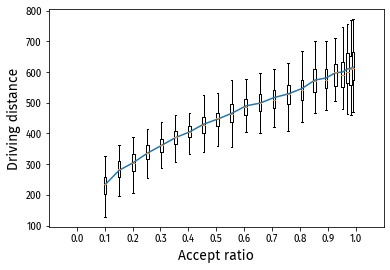

In [177]:
# total_cost_ls
import numpy as np
import matplotlib.pyplot as plt
plt.boxplot(dist_ls, positions=accept_ratio_ls, widths=0.01,showfliers=False);
plt.plot(accept_ratio_ls, np.mean(np.array(dist_ls),axis=1))

plt.xticks(np.arange(0,1.1,0.1),[round(x,2) for x in np.arange(0,1.1,0.1)],fontproperties=prop,fontsize=xticks_fontsize)
plt.yticks(fontproperties=prop,fontsize=xticks_fontsize)
plt.xlim(-0.1,1.1)
plt.xlabel('Accept ratio',fontproperties=prop,fontsize=xlabel_fontsize)
plt.ylabel('Driving distance',fontproperties=prop,fontsize=ylabel_fontsize)